# 2 Cricket Project - predicting the market value of international cricketers - exploratory data analysis

## 2.1 Contents

## 2.2 Introduction

Although cricket may be seen as a niche sport, and is only played in a limited number of countries, it has genuine claims to being a global sport and a major international business. Stemming from Great Britain, and to some extents spread by the former British Empire, cricket is played domestically and internationally by a growing number of countries, although there are clear distinctions between top tier playing nations and those in other tiers. However, the professionalism and commercialisation of the sport is breaking down those distinctions and barriers faster than at another time in the sport. In part this is due to the changing formats of the game. Historically, cricket matches were played over a number of days until they finished (with not set time for completion). This could result in games of significantly varying lengths, from a  couple of days to a couple of weeks (games being based on two innings per side (and 11 players by side), with the winning side being the team with the highest overall score in those two innings). By the end of the Second World War, this practice stopped and the role of broadcasting rights (and associated advertising revenue) has played an increasing role in setting the parameters and formats for the game. So, from the end of the Second World War, international cricket became limited to five days, with an acceptance that there would be an increase in the number of unconcluded, hence drawn games. Over time, pressure to adapt the game an international level, and grow the business of the game has seen different formats emerge, from one-day limited-overs cricket (eg, 40, 50  or 60 overs per side, which is usually manageable within one day) to shorter formats such as T20 (high-intensity, fast-paced 20-over cricket, that is finished within a matter of hours, a form of heresy for older cricket fans brought up on longer, slower and more strategic forms of the game).

At the same time, the power base of cricket has moved from England/Great Britain to South Asia, in particular India, where the appeal, popuplarity, market and revenue for all forms of cricket is massive. Globalisation, the internet, cheaper/easier travel have also created internation cricket competitions and formats outside of the historical/traditional competitions where one country competes against another in a Test series. Now, most senior cricket playing nations will host there own domestic competitions, which are genuinely international competitions open to cricketers and teams from oround the world. Nowhere is this better exemplified that in the Indian Premier League, where a number of team franchises bid for Indian and international players at an auction to build a team that will compete in May/June of each year to win the annual trophy and lucrative prices. The audiences in the huge India stadia are massive, but are dwarfed by the national and international television/online audiences and the betting market associated with the games. Players from around the world flock to the IPL for the money and the fame, confounding the traditional domestic route to cricketing fame and glory - many players prefer to compete in the IPL than to be available for international selection in their own countries. It is a fact of life that national cricketing authorities have had to accept the financial reality of events such as the IPL or the Australian Big Bash or ... And the situation continues to shift, as participation in the IPL is now seen as beneficial to the development of certain or different types of cricketers at international level. There is always something to learn in both directions it seems.

The datasets used in this project have been drawn from publicly available international cricket data, setting out individual players' performance in traditional international cricketing formats, while drawing up the publicly availalbe IPL data on the most recent player auction (December 2022 for the 2023 season) and also the IPL's historic player performance data. Furthermore, reference data from international cricket "salaries"/retainers is available. 

The aim is to anaylyse the data to see if a model can be developed to predict accurately the value of the current/upcoming stars of the IPL. Overpaid upstarts or worth their weight in gold? What makes the most valuable IPL player and are they worth it? 

## 2.3 Imports

In [1]:
#import relevant packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## 2.4 Load the data
### 2.4.1 IPL data

In [2]:
#Load data and check appearance
IPLBatting = pd.read_csv(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\IPLBatStatscleaneddata.csv')
IPLBatting.head()

,Unnamed: 0,IPL_Bat_Rank,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,HS_was_NO
0,0,1.0,Virat Kohli,223.0,215.0,32.0,6624.0,113.0,36.20,5129.0,129.15,5.0,44.0,578.0,218.0,False
1,1,2.0,Shikhar Dhawan,206.0,205.0,27.0,6244.0,106.0,35.08,4942.0,126.35,2.0,47.0,701.0,136.0,True
2,2,3.0,David Warner,162.0,162.0,22.0,5881.0,126.0,42.01,4180.0,140.69,4.0,54.0,561.0,211.0,False
3,3,4.0,Rohit Sharma,227.0,222.0,28.0,5879.0,109.0,30.30,4526.0,129.89,1.0,40.0,519.0,240.0,True
4,4,5.0,Suresh Raina,205.0,200.0,30.0,5528.0,100.0,32.52,4042.0,136.76,1.0,39.0,506.0,203.0,True


In [3]:
IPLBatting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    126 non-null    int64  
 1   IPL_Bat_Rank  126 non-null    float64
 2   Player        126 non-null    object 
 3   Mat           126 non-null    float64
 4   Inns          126 non-null    float64
 5   NO            126 non-null    float64
 6   Runs          126 non-null    float64
 7   HS            126 non-null    float64
 8   Avg           126 non-null    float64
 9   BF            126 non-null    float64
 10  SR            126 non-null    float64
 11  100           126 non-null    float64
 12  50            126 non-null    float64
 13  4s            126 non-null    float64
 14  6s            126 non-null    float64
 15  HS_was_NO     126 non-null    bool   
dtypes: bool(1), float64(13), int64(1), object(1)
memory usage: 15.0+ KB


In [4]:
IPLBatting.shape

(126, 16)

In [5]:
del IPLBatting['Unnamed: 0']
IPLBatting.head()

,IPL_Bat_Rank,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,HS_was_NO
0,1.0,Virat Kohli,223.0,215.0,32.0,6624.0,113.0,36.20,5129.0,129.15,5.0,44.0,578.0,218.0,False
1,2.0,Shikhar Dhawan,206.0,205.0,27.0,6244.0,106.0,35.08,4942.0,126.35,2.0,47.0,701.0,136.0,True
2,3.0,David Warner,162.0,162.0,22.0,5881.0,126.0,42.01,4180.0,140.69,4.0,54.0,561.0,211.0,False
3,4.0,Rohit Sharma,227.0,222.0,28.0,5879.0,109.0,30.30,4526.0,129.89,1.0,40.0,519.0,240.0,True
4,5.0,Suresh Raina,205.0,200.0,30.0,5528.0,100.0,32.52,4042.0,136.76,1.0,39.0,506.0,203.0,True


In [6]:
#Load data and check appearance
IPLBowling = pd.read_excel(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\IPLBowlStatscleandata.xlsx')
IPLBowling.head()

,Unnamed: 0,IPL_Bowl_Rank,Player,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR
0,0,1,Dwayne Bravo,161,158,516,4359,183,2022-04-01 00:00:00,23.82,8.38,17.05
1,1,2,Lasith Malinga,122,122,471,3366,170,2013-05-01 00:00:00,19.80,7.14,16.63
2,2,3,Amit Mishra,154,154,540,3980,166,2017-05-01 00:00:00,23.98,7.36,19.55
3,3,4,Yuzvendra Chahal,131,130,475,3624,166,1940-05-01 00:00:00,21.83,7.61,17.20
4,4,5,Piyush Chawla,165,164,545,4301,157,2017-04-01 00:00:00,27.39,7.88,20.85


In [7]:
IPLBowling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     168 non-null    int64  
 1   IPL_Bowl_Rank  168 non-null    int64  
 2   Player         168 non-null    object 
 3   Mat            168 non-null    int64  
 4   Inns           168 non-null    int64  
 5   Ov             168 non-null    int64  
 6   Runs           168 non-null    int64  
 7   Wkts           168 non-null    int64  
 8   BBI            168 non-null    object 
 9   Avg            168 non-null    float64
 10  Econ           168 non-null    float64
 11  SR             168 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 15.9+ KB


In [8]:
IPLBowling.shape

(168, 12)

In [9]:
del IPLBowling['Unnamed: 0']
IPLBowling.head()

,IPL_Bowl_Rank,Player,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR
0,1,Dwayne Bravo,161,158,516,4359,183,2022-04-01 00:00:00,23.82,8.38,17.05
1,2,Lasith Malinga,122,122,471,3366,170,2013-05-01 00:00:00,19.80,7.14,16.63
2,3,Amit Mishra,154,154,540,3980,166,2017-05-01 00:00:00,23.98,7.36,19.55
3,4,Yuzvendra Chahal,131,130,475,3624,166,1940-05-01 00:00:00,21.83,7.61,17.20
4,5,Piyush Chawla,165,164,545,4301,157,2017-04-01 00:00:00,27.39,7.88,20.85


In [10]:
#Load data and check appearance
IPL_MVP = pd.read_excel(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\IPLMVPStatscleaneddata.xlsx')
IPL_MVP.head()

,Unnamed: 0,IPL_MVP_Rank,Player,IPL_MVP_Pts,Mat,Wkts,Dots,4s,6s,Catches,Run outs,Stumpings
0,0,1,Jos Buttler,387.5,17,0,0,83,45,9,0.0,0
1,1,2,Hardik Pandya,284.5,15,8,76,49,12,4,6.0,0
2,2,3,Andre Russell,281.0,14,17,58,18,32,2,1.5,0
3,3,4,Prasidh Krishna,273.0,17,19,200,0,0,2,1.5,0
4,4,5,Liam Livingstone,265.5,14,6,38,29,34,6,0.0,0


In [11]:
IPL_MVP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    172 non-null    int64  
 1   IPL_MVP_Rank  172 non-null    int64  
 2   Player        172 non-null    object 
 3   IPL_MVP_Pts   172 non-null    float64
 4   Mat           172 non-null    int64  
 5   Wkts          172 non-null    int64  
 6   Dots          172 non-null    int64  
 7   4s            172 non-null    int64  
 8   6s            172 non-null    int64  
 9   Catches       172 non-null    int64  
 10  Run outs      172 non-null    float64
 11  Stumpings     172 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 16.2+ KB


In [12]:
IPL_MVP.shape

(172, 12)

In [13]:
del IPL_MVP['Unnamed: 0']
IPL_MVP.head()

,IPL_MVP_Rank,Player,IPL_MVP_Pts,Mat,Wkts,Dots,4s,6s,Catches,Run outs,Stumpings
0,1,Jos Buttler,387.5,17,0,0,83,45,9,0.0,0
1,2,Hardik Pandya,284.5,15,8,76,49,12,4,6.0,0
2,3,Andre Russell,281.0,14,17,58,18,32,2,1.5,0
3,4,Prasidh Krishna,273.0,17,19,200,0,0,2,1.5,0
4,5,Liam Livingstone,265.5,14,6,38,29,34,6,0.0,0


In [14]:
#Load data and check appearance
IPL_Price_Stats = pd.read_excel(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\IPLPriceNStatcleaneddata.xlsx')
IPL_Price_Stats.head()


,Unnamed: 0,Player,Country,Team,Type,Auction-Base_price,Auc-Base_price_pounds,IPL_Bat_Rank,Mat_x,Inns_x,...,IPL_Bowl_Rank,Mat_y,Inns_y,Ov,Runs_y,Wkts,BBI,Avg_y,Econ,SR_y
0,0,Deepak Chahar,India,Chennai Super Kings,Bowler,140000000,1396080,NaN,NaN,NaN,...,52.0,63.0,63.0,220.0,1722.0,59.0,2013-04-01 00:00:00,29.19,7.80,22.44
1,1,Ambati Rayudu,India,Chennai Super Kings,Wicket Keeper,67500000,673110,12.0,188.0,175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,44000000,438768,58.0,161.0,113.0,...,1.0,161.0,158.0,516.0,4359.0,183.0,2022-04-01 00:00:00,23.82,8.38,17.05
3,3,Shivam Dube,India,Chennai Super Kings,All-Rounder,40000000,398880,103.0,35.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Chris Jordan,England,Chennai Super Kings,All-Rounder,36000000,358992,NaN,NaN,NaN,...,114.0,28.0,28.0,88.0,833.0,27.0,2023-11-04 00:00:00,30.85,9.32,19.85


In [15]:
IPL_Price_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             600 non-null    int64  
 1   Player                 600 non-null    object 
 2   Country                600 non-null    object 
 3   Team                   600 non-null    object 
 4   Type                   600 non-null    object 
 5   Auction-Base_price     600 non-null    int64  
 6   Auc-Base_price_pounds  600 non-null    int64  
 7   IPL_Bat_Rank           46 non-null     float64
 8   Mat_x                  46 non-null     float64
 9   Inns_x                 46 non-null     float64
 10  NO                     46 non-null     float64
 11  Runs_x                 46 non-null     float64
 12  HS                     46 non-null     float64
 13  Avg_x                  46 non-null     float64
 14  BF                     46 non-null     float64
 15  SR_x  

In [16]:
IPL_Price_Stats.shape

(600, 31)

In [17]:
del IPL_Price_Stats['Unnamed: 0']
IPL_Price_Stats.head()

,Player,Country,Team,Type,Auction-Base_price,Auc-Base_price_pounds,IPL_Bat_Rank,Mat_x,Inns_x,NO,...,IPL_Bowl_Rank,Mat_y,Inns_y,Ov,Runs_y,Wkts,BBI,Avg_y,Econ,SR_y
0,Deepak Chahar,India,Chennai Super Kings,Bowler,140000000,1396080,NaN,NaN,NaN,NaN,...,52.0,63.0,63.0,220.0,1722.0,59.0,2013-04-01 00:00:00,29.19,7.80,22.44
1,Ambati Rayudu,India,Chennai Super Kings,Wicket Keeper,67500000,673110,12.0,188.0,175.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,44000000,438768,58.0,161.0,113.0,44.0,...,1.0,161.0,158.0,516.0,4359.0,183.0,2022-04-01 00:00:00,23.82,8.38,17.05
3,Shivam Dube,India,Chennai Super Kings,All-Rounder,40000000,398880,103.0,35.0,33.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chris Jordan,England,Chennai Super Kings,All-Rounder,36000000,358992,NaN,NaN,NaN,NaN,...,114.0,28.0,28.0,88.0,833.0,27.0,2023-11-04 00:00:00,30.85,9.32,19.85


### 2.4.2 International data

In [18]:
#Load data and check appearance
IntCrickSals = pd.read_excel(r'C:\Users\Pearc\OneDrive\Documents\Data Science\Springboard\SpringboardCapstone2\data\interim_data\InternatCrickSalspartcleaneddata.xlsx')
IntCrickSals.head()

,Unnamed: 0,Players,Country,Retainer Fee / contract / base salary,Test Fee,ODI Fee,T20 Fee,Base_sal_pounds
0,0,Babar Azam,Pakistan,1.25 million PKR (+ undisclosed Captain allowa...,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
1,1,Mohammad Rizwan,Pakistan,1.25 million PKR per month,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
2,2,Hasan Ali,Pakistan,1.25 million PKR per month,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
3,3,Shaheen Afridi,Pakistan,1.25 million PKR per month,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
4,4,Azhar Ali,Pakistan,"937,500 PKRper month","PKR 40,000",0,0,39375.0


In [19]:
IntCrickSals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             176 non-null    int64  
 1   Players                                176 non-null    object 
 2   Country                                176 non-null    object 
 3   Retainer Fee / contract / base salary  176 non-null    object 
 4   Test Fee                               176 non-null    object 
 5   ODI Fee                                176 non-null    object 
 6   T20 Fee                                176 non-null    object 
 7   Base_sal_pounds                        176 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 11.1+ KB


In [20]:
IntCrickSals.shape

(176, 8)

In [21]:
del IntCrickSals['Unnamed: 0']
IntCrickSals.head()

,Players,Country,Retainer Fee / contract / base salary,Test Fee,ODI Fee,T20 Fee,Base_sal_pounds
0,Babar Azam,Pakistan,1.25 million PKR (+ undisclosed Captain allowa...,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
1,Mohammad Rizwan,Pakistan,1.25 million PKR per month,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
2,Hasan Ali,Pakistan,1.25 million PKR per month,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
3,Shaheen Afridi,Pakistan,1.25 million PKR per month,"PKR 50,000","PKR 25,000","PKR 15,000",59184.0
4,Azhar Ali,Pakistan,"937,500 PKRper month","PKR 40,000",0,0,39375.0


## 2.4 Explore the data
### 2.4.1 IPL data
The two datasets to concentrate on are the IPL_Price_Stats dataset (as this already has the IPL Bowling and Batting stats merged into it) and the IPL_MVP (most valued player) dataset.

In [22]:
#Looking at IPL_Price_Stats in more detail
IPL_Price_Stats.columns


Index(['Player', 'Country', 'Team', 'Type', 'Auction-Base_price',
       'Auc-Base_price_pounds', 'IPL_Bat_Rank', 'Mat_x', 'Inns_x', 'NO',
       'Runs_x', 'HS', 'Avg_x', 'BF', 'SR_x', '100', '50', '4s', '6s',
       'HS_was_NO', 'IPL_Bowl_Rank', 'Mat_y', 'Inns_y', 'Ov', 'Runs_y', 'Wkts',
       'BBI', 'Avg_y', 'Econ', 'SR_y'],
      dtype='object')

In [23]:
IPL_Price_Stats.iloc[0:3]

,Player,Country,Team,Type,Auction-Base_price,Auc-Base_price_pounds,IPL_Bat_Rank,Mat_x,Inns_x,NO,...,IPL_Bowl_Rank,Mat_y,Inns_y,Ov,Runs_y,Wkts,BBI,Avg_y,Econ,SR_y
0,Deepak Chahar,India,Chennai Super Kings,Bowler,140000000,1396080,NaN,NaN,NaN,NaN,...,52.0,63.0,63.0,220.0,1722.0,59.0,2013-04-01 00:00:00,29.19,7.80,22.44
1,Ambati Rayudu,India,Chennai Super Kings,Wicket Keeper,67500000,673110,12.0,188.0,175.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,44000000,438768,58.0,161.0,113.0,44.0,...,1.0,161.0,158.0,516.0,4359.0,183.0,2022-04-01 00:00:00,23.82,8.38,17.05


In [24]:
#Make some of headings clearer
IPL_Price_Stats.rename(columns = {'Mat_x':'Batting_Matches', 'Inns_x':'Batting_Inns', 'Runs_x': 'Batting_runs', 'Avg_x': 'Batting_Avg', 'SR_x': 'Bat_SR', 'Mat_y': 'Bowling_Matches', 'Inns_y':'Bowling_Inns', 'Runs_y': 'Bowling_runs_concd', 'Avg_y': 'Bowling_Avg', 'SR_y': 'Bowl_SR'}, inplace = True)
IPL_Price_Stats.columns

Index(['Player', 'Country', 'Team', 'Type', 'Auction-Base_price',
       'Auc-Base_price_pounds', 'IPL_Bat_Rank', 'Batting_Matches',
       'Batting_Inns', 'NO', 'Batting_runs', 'HS', 'Batting_Avg', 'BF',
       'Bat_SR', '100', '50', '4s', '6s', 'HS_was_NO', 'IPL_Bowl_Rank',
       'Bowling_Matches', 'Bowling_Inns', 'Ov', 'Bowling_runs_concd', 'Wkts',
       'BBI', 'Bowling_Avg', 'Econ', 'Bowl_SR'],
      dtype='object')

In [25]:
#Drop some of the extraneous columns, namely auction price in rupees, but also BBI (which turns out to be the date of the best bowling performance in an innings, so not a helpful measure)
IPL_Price_Stats = IPL_Price_Stats.drop(['Auction-Base_price', 'BBI'], axis=1)
IPL_Price_Stats.head(3)


,Player,Country,Team,Type,Auc-Base_price_pounds,IPL_Bat_Rank,Batting_Matches,Batting_Inns,NO,Batting_runs,...,HS_was_NO,IPL_Bowl_Rank,Bowling_Matches,Bowling_Inns,Ov,Bowling_runs_concd,Wkts,Bowling_Avg,Econ,Bowl_SR
0,Deepak Chahar,India,Chennai Super Kings,Bowler,1396080,NaN,NaN,NaN,NaN,NaN,...,NaN,52.0,63.0,63.0,220.0,1722.0,59.0,29.19,7.80,22.44
1,Ambati Rayudu,India,Chennai Super Kings,Wicket Keeper,673110,12.0,188.0,175.0,31.0,4190.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,438768,58.0,161.0,113.0,44.0,1560.0,...,1.0,1.0,161.0,158.0,516.0,4359.0,183.0,23.82,8.38,17.05


In [26]:
IPL_Price_Stats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 600 non-null    object 
 1   Country                600 non-null    object 
 2   Team                   600 non-null    object 
 3   Type                   600 non-null    object 
 4   Auc-Base_price_pounds  600 non-null    int64  
 5   IPL_Bat_Rank           46 non-null     float64
 6   Batting_Matches        46 non-null     float64
 7   Batting_Inns           46 non-null     float64
 8   NO                     46 non-null     float64
 9   Batting_runs           46 non-null     float64
 10  HS                     46 non-null     float64
 11  Batting_Avg            46 non-null     float64
 12  BF                     46 non-null     float64
 13  Bat_SR                 46 non-null     float64
 14  100                    46 non-null     float64
 15  50    

In [27]:
#Check categories within Team - shows majority of players listed were unsold in the auction
IPL_Price_Stats['Team'].value_counts()

Unsold                         396
Punjab Kings                    23
Chennai Super Kings             21
Kolkata Knight Riders           21
Mumbai Indians                  21
Rajasthan Royals                21
Delhi Capitals                  20
Gujarat Titans                  20
Sunrisers Hyderabad             20
Royal Challengers Bangalore     19
Lucknow Super Giants            18
Name: Team, dtype: int64

In [28]:
IPL_Price_Stats['Type'].value_counts()

All-Rounder      232
Bowler           206
Batsman          103
Wicket Keeper     59
Name: Type, dtype: int64

In [29]:
IPL_Unsold = IPL_Price_Stats[IPL_Price_Stats['Team']=='Unsold']
IPL_Unsold.head()

,Player,Country,Team,Type,Auc-Base_price_pounds,IPL_Bat_Rank,Batting_Matches,Batting_Inns,NO,Batting_runs,...,HS_was_NO,IPL_Bowl_Rank,Bowling_Matches,Bowling_Inns,Ov,Bowling_runs_concd,Wkts,Bowling_Avg,Econ,Bowl_SR
204,Suresh Raina,India,Unsold,Batsman,199440,5.0,205.0,200.0,30.0,5528.0,...,1.0,122.0,205.0,69.0,151.0,1118.0,25.0,44.72,7.39,36.32
205,Steve Smith,Australia,Unsold,Batsman,199440,32.0,103.0,93.0,21.0,2485.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,Shakib Al Hasan,Bangladesh,Unsold,All-Rounder,199440,96.0,71.0,52.0,12.0,793.0,...,1.0,46.0,71.0,70.0,247.0,1839.0,63.0,29.19,7.44,23.56
207,Adil Rashid,England,Unsold,Bowler,199440,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,Imran Tahir,South Africa,Unsold,Bowler,199440,NaN,NaN,NaN,NaN,NaN,...,NaN,35.0,59.0,59.0,219.0,1703.0,82.0,20.77,7.76,16.05


So, have a problem with the range/number of missing values in this dataframe. Because players tend to be classed primarily as either Batsmen, Bowlers or All-rounders, we may inevitably have some missing values for batting stats where a player is primarily a bowler, and vice versa. For All-rounders(ie, players who bat and bowl), we have data on both aspects. Wicket-keepers tend also to be batsmen, so we will have batting stats for them. 

We also have both Sold and Unsold players in this dataset - so, where they have not played in previous IPLs, there will be no performance data on them, so there will be a large number of null values, 22 by my reckoning for each player. So, if we can tally up which rows have this level of null data, we can then remove the rows in full. (It would be useful to keep these removed rows, for if we can attach other performance data to them, then we could use this to find what might be a suitable price, particularly for those that were sold, but are IPL first-timers.) Then for the remaining null values we can legitimately assign zero to them. 

In [30]:
#Count number of null values in row
for i in range(len(IPL_Price_Stats.index)):
    print(" Total NaN in row", i + 1, ":",
          IPL_Price_Stats.iloc[i].isnull().sum())

 Total NaN in row 1 : 14
 Total NaN in row 2 : 9
 Total NaN in row 3 : 0
 Total NaN in row 4 : 9
 Total NaN in row 5 : 14
 Total NaN in row 6 : 9
 Total NaN in row 7 : 23
 Total NaN in row 8 : 23
 Total NaN in row 9 : 23
 Total NaN in row 10 : 23
 Total NaN in row 11 : 23
 Total NaN in row 12 : 23
 Total NaN in row 13 : 23
 Total NaN in row 14 : 23
 Total NaN in row 15 : 23
 Total NaN in row 16 : 23
 Total NaN in row 17 : 23
 Total NaN in row 18 : 23
 Total NaN in row 19 : 23
 Total NaN in row 20 : 23
 Total NaN in row 21 : 23
 Total NaN in row 22 : 14
 Total NaN in row 23 : 14
 Total NaN in row 24 : 9
 Total NaN in row 25 : 23
 Total NaN in row 26 : 14
 Total NaN in row 27 : 23
 Total NaN in row 28 : 14
 Total NaN in row 29 : 14
 Total NaN in row 30 : 23
 Total NaN in row 31 : 23
 Total NaN in row 32 : 9
 Total NaN in row 33 : 23
 Total NaN in row 34 : 23
 Total NaN in row 35 : 23
 Total NaN in row 36 : 23
 Total NaN in row 37 : 23
 Total NaN in row 38 : 23
 Total NaN in row 39 : 9
 T

 Total NaN in row 518 : 23
 Total NaN in row 519 : 23
 Total NaN in row 520 : 23
 Total NaN in row 521 : 23
 Total NaN in row 522 : 23
 Total NaN in row 523 : 23
 Total NaN in row 524 : 23
 Total NaN in row 525 : 23
 Total NaN in row 526 : 23
 Total NaN in row 527 : 23
 Total NaN in row 528 : 23
 Total NaN in row 529 : 23
 Total NaN in row 530 : 23
 Total NaN in row 531 : 23
 Total NaN in row 532 : 23
 Total NaN in row 533 : 23
 Total NaN in row 534 : 23
 Total NaN in row 535 : 23
 Total NaN in row 536 : 23
 Total NaN in row 537 : 23
 Total NaN in row 538 : 23
 Total NaN in row 539 : 23
 Total NaN in row 540 : 23
 Total NaN in row 541 : 23
 Total NaN in row 542 : 23
 Total NaN in row 543 : 23
 Total NaN in row 544 : 23
 Total NaN in row 545 : 23
 Total NaN in row 546 : 23
 Total NaN in row 547 : 23
 Total NaN in row 548 : 23
 Total NaN in row 549 : 23
 Total NaN in row 550 : 23
 Total NaN in row 551 : 23
 Total NaN in row 552 : 23
 Total NaN in row 553 : 23
 Total NaN in row 554 : 23
 

In [31]:
#Create subset of players who don't have any performance data attributed to them.
IPL_Price_Stats_removed_players = IPL_Price_Stats[IPL_Price_Stats['BF'].isnull() & IPL_Price_Stats['Ov'].isnull()]
IPL_Price_Stats_removed_players.head()



,Player,Country,Team,Type,Auc-Base_price_pounds,IPL_Bat_Rank,Batting_Matches,Batting_Inns,NO,Batting_runs,...,HS_was_NO,IPL_Bowl_Rank,Bowling_Matches,Bowling_Inns,Ov,Bowling_runs_concd,Wkts,Bowling_Avg,Econ,Bowl_SR
6,Mitchell Santner,New Zealand,Chennai Super Kings,All-Rounder,189468,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Adam Milne,New Zealand,Chennai Super Kings,Bowler,189468,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Rajvardhan Hangargekar,India,Chennai Super Kings,All-Rounder,149580,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Prashant Solanki,India,Chennai Super Kings,Bowler,119664,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Devon Conway,New Zealand,Chennai Super Kings,Batsman,99720,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
IPL_Price_Stats_removed_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 6 to 599
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 497 non-null    object 
 1   Country                497 non-null    object 
 2   Team                   497 non-null    object 
 3   Type                   497 non-null    object 
 4   Auc-Base_price_pounds  497 non-null    int64  
 5   IPL_Bat_Rank           0 non-null      float64
 6   Batting_Matches        0 non-null      float64
 7   Batting_Inns           0 non-null      float64
 8   NO                     0 non-null      float64
 9   Batting_runs           0 non-null      float64
 10  HS                     0 non-null      float64
 11  Batting_Avg            0 non-null      float64
 12  BF                     0 non-null      float64
 13  Bat_SR                 0 non-null      float64
 14  100                    0 non-null      float64
 15  50    

In [33]:
IPL_Price_Stats_removed_players['Team'].value_counts()

Unsold                         370
Punjab Kings                    16
Chennai Super Kings             15
Mumbai Indians                  14
Royal Challengers Bangalore     14
Delhi Capitals                  12
Kolkata Knight Riders           12
Rajasthan Royals                12
Gujarat Titans                  11
Sunrisers Hyderabad             11
Lucknow Super Giants            10
Name: Team, dtype: int64

So, worth bearing in mind that 127 players were purchased, but haven't played in the IPL before so no performance data available for them. May need to come back to this group of players.

In [34]:
#Drop rows with at least 10 non-Na values
IPL_Price_Stats = IPL_Price_Stats.dropna(thresh=10)
IPL_Price_Stats = IPL_Price_Stats.reset_index(drop=True)
IPL_Price_Stats.head()

,Player,Country,Team,Type,Auc-Base_price_pounds,IPL_Bat_Rank,Batting_Matches,Batting_Inns,NO,Batting_runs,...,HS_was_NO,IPL_Bowl_Rank,Bowling_Matches,Bowling_Inns,Ov,Bowling_runs_concd,Wkts,Bowling_Avg,Econ,Bowl_SR
0,Deepak Chahar,India,Chennai Super Kings,Bowler,1396080,NaN,NaN,NaN,NaN,NaN,...,NaN,52.0,63.0,63.0,220.0,1722.0,59.0,29.19,7.80,22.44
1,Ambati Rayudu,India,Chennai Super Kings,Wicket Keeper,673110,12.0,188.0,175.0,31.0,4190.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,438768,58.0,161.0,113.0,44.0,1560.0,...,1.0,1.0,161.0,158.0,516.0,4359.0,183.0,23.82,8.38,17.05
3,Shivam Dube,India,Chennai Super Kings,All-Rounder,398880,103.0,35.0,33.0,5.0,688.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chris Jordan,England,Chennai Super Kings,All-Rounder,358992,NaN,NaN,NaN,NaN,NaN,...,NaN,114.0,28.0,28.0,88.0,833.0,27.0,30.85,9.32,19.85


In [35]:
IPL_Price_Stats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 103 non-null    object 
 1   Country                103 non-null    object 
 2   Team                   103 non-null    object 
 3   Type                   103 non-null    object 
 4   Auc-Base_price_pounds  103 non-null    int64  
 5   IPL_Bat_Rank           46 non-null     float64
 6   Batting_Matches        46 non-null     float64
 7   Batting_Inns           46 non-null     float64
 8   NO                     46 non-null     float64
 9   Batting_runs           46 non-null     float64
 10  HS                     46 non-null     float64
 11  Batting_Avg            46 non-null     float64
 12  BF                     46 non-null     float64
 13  Bat_SR                 46 non-null     float64
 14  100                    46 non-null     float64
 15  50    

In [36]:
IPL_Price_Stats.shape


(103, 28)

In [37]:
#Check columns for missing values
IPL_Price_Stats.isnull().sum()

Player                    0
Country                   0
Team                      0
Type                      0
Auc-Base_price_pounds     0
IPL_Bat_Rank             57
Batting_Matches          57
Batting_Inns             57
NO                       57
Batting_runs             57
HS                       57
Batting_Avg              57
BF                       57
Bat_SR                   57
100                      57
50                       57
4s                       57
6s                       57
HS_was_NO                57
IPL_Bowl_Rank            37
Bowling_Matches          37
Bowling_Inns             37
Ov                       37
Bowling_runs_concd       37
Wkts                     37
Bowling_Avg              37
Econ                     37
Bowl_SR                  37
dtype: int64

 Who are the top players by some of the key stats?

In [38]:
IPL_Price_Stats_NewIndex = IPL_Price_Stats.set_index('Player')

In [39]:
IPL_Price_Stats_NewIndex.rename(columns = {'Auc-Base_price_pounds':'Auc_Base_price_pounds'}, inplace=True)

Let's look at auction price, Batting Average, Highest Score (HS), Batting Strike Rate (Bats_SR), Wickets, Bowling Average, Economy and Bowling strike rate (Bowl_SR)


In [40]:
IPL_Price_Stats_NewIndex.Auc_Base_price_pounds.sort_values(ascending=False).head(10)

Player
Ishan Kishan         1520730
Deepak Chahar        1396080
Shreyas Iyer         1221570
Liam Livingstone     1146780
Nicholas Pooran      1071990
Shardul Thakur       1071990
Harshal Patel        1071990
Wanindu Hasaranga    1071990
Avesh Khan            997200
Lockie Ferguson       997200
Name: Auc_Base_price_pounds, dtype: int64

## Batting

In [41]:
IPL_Price_Stats_NewIndex.Batting_Avg.sort_values(ascending=False).head(10)

Player
David Warner      42.01
Aiden Markram     40.54
David Miller      37.20
Jonny Bairstow    35.86
Shikhar Dhawan    35.08
Steve Smith       34.51
Chris Lynn        34.08
Suresh Raina      32.52
Shreyas Iyer      31.55
Ajinkya Rahane    30.86
Name: Batting_Avg, dtype: float64

In [42]:
IPL_Price_Stats_NewIndex.HS.sort_values(ascending=False).head(10)

Player
Murali Vijay        127.0
David Warner        126.0
Wriddhiman Saha     115.0
Manish Pandey       114.0
Jonny Bairstow      114.0
Shikhar Dhawan      106.0
Ajinkya Rahane      105.0
Devdutt Padikkal    101.0
Steve Smith         101.0
David Miller        101.0
Name: HS, dtype: float64

In [43]:
IPL_Price_Stats_NewIndex.Bat_SR.sort_values(ascending=False).head(10)

Player
Liam Livingstone    166.87
Shimron Hetmyer     152.20
Nicholas Pooran     151.24
Jonny Bairstow      142.65
Rahul Tripathi      140.80
David Warner        140.69
Chris Lynn          140.63
Sarfaraz Khan       137.82
David Miller        137.69
Evin Lewis          137.11
Name: Bat_SR, dtype: float64

A real mixture of names in the Top 10 lists, indicating it's not always easy to judge who's the best player. Batting average tends to be a good indicator of consistent run scores, which Highest Score is susceptible to being an outlier in a players range of scores, if it's not backed up by a good average. Strike rate (number of runs per 100 balls faced) is arguably a strong indicator of batting performance/success in the shorter, more dynamic and explosive form of cricket, where runs on the board at speed will often win the match (and the money!)

May well explain why Liam Livingstone features highly in the price list while not appearing in the highest score or batting average Top 10s, but then he does top the Strike Rate Top 10. Otherwise David Warner, Jonny Bairstow, David Miller, Steve Smith and Shikhar Dhawan feature strongly in two or three of the lists.

# Bowling

In [44]:
IPL_Price_Stats_NewIndex.Wkts.sort_values(ascending=False).head(10)

Player
Dwayne Bravo         183.0
Amit Mishra          166.0
Amit Mishra          166.0
Yuzvendra Chahal     166.0
Piyush Chawla        157.0
Bhuvneshwar Kumar    154.0
Umesh Yadav          135.0
Sandeep Sharma       114.0
Mohammad Shami        99.0
Kagiso Rabada         99.0
Name: Wkts, dtype: float64

In [45]:
#Bowling averages - lower value is better
IPL_Price_Stats_NewIndex.Bowling_Avg.sort_values(ascending=True).head(10)

Player
Wanindu Hasaranga      18.85
Kagiso Rabada          19.86
Imran Tahir            20.77
Jofra Archer           21.33
Mitchell Marsh         21.75
Yuzvendra Chahal       21.83
Harshal Patel          22.87
Nathan Coulter-Nile    22.92
Josh Hazlewood         22.94
Andrew Tye             23.31
Name: Bowling_Avg, dtype: float64

In [46]:
#Economy rate - lower is better (ie, fewer runs given away per over)
IPL_Price_Stats_NewIndex.Econ.sort_values(ascending=True).head(10)

Player
Jayant Yadav         6.87
Rahul Sharma         7.02
Jofra Archer         7.13
Mohammad Nabi        7.14
Washington Sundar    7.23
Bhuvneshwar Kumar    7.30
Krunal Pandya        7.31
Wayne Parnell        7.35
Amit Mishra          7.36
Amit Mishra          7.36
Name: Econ, dtype: float64

In [47]:
#Bowling strike rate - lower is better (ie, fewer balls before get a wicket and remove a batsman)
IPL_Price_Stats_NewIndex.Bowl_SR.sort_values(ascending=True).head(10)

Player
Kagiso Rabada        14.42
Wanindu Hasaranga    14.54
Imran Tahir          16.05
Mitchell Marsh       16.29
Andrew Tye           16.29
Harshal Patel        16.34
Jason Holder         16.82
Dwayne Bravo         17.05
Josh Hazlewood       17.16
Yuzvendra Chahal     17.20
Name: Bowl_SR, dtype: float64

Again, a mixed bag of bowlers here, and slightly harder to pull out the key statistics here. Economy and strike rate are clearly crucial and go hand in hand well, so interesting to see that no-one features in both those lists. Bowling average is a good longer term indicator, and of course nothing beats the results that overall wickets taken shows/proves. Names that stand out include Jofra Archer, Dwayne Bravo and Amit Mishra (and note that he seems to have two entries, so need to look at that).

In [48]:
#Check unique player names
IPL_Price_Stats['Player'].nunique()

102

102 unique names out of 103 total, so need to remove Amit Mishra duplicate

In [49]:
IPL_Price_Stats[IPL_Price_Stats['Player']=='Amit Mishra']

,Player,Country,Team,Type,Auc-Base_price_pounds,IPL_Bat_Rank,Batting_Matches,Batting_Inns,NO,Batting_runs,...,HS_was_NO,IPL_Bowl_Rank,Bowling_Matches,Bowling_Inns,Ov,Bowling_runs_concd,Wkts,Bowling_Avg,Econ,Bowl_SR
81,Amit Mishra,India,Unsold,Bowler,149580,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,154.0,154.0,540.0,3980.0,166.0,23.98,7.36,19.55
102,Amit Mishra,India,Unsold,Bowler,19944,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,154.0,154.0,540.0,3980.0,166.0,23.98,7.36,19.55


In [50]:
#Drop one of the Amit Mishra rows (and double-check)
#IPL_Price_Stats = IPL_Price_Stats.drop(index=102)
#IPL_Price_Stats[IPL_Price_Stats['Player']=='Amit Mishra']


#Going to leave him in until do more research on what prices he sold for

In [51]:
#And do the same with the NewIndex version
#IPL_Price_Stats_NewIndex[IPL_Price_Stats_NewIndex.index=='Amit Mishra']

Also, need to bring together a list of all auctioned players, so that can analyse purchasing habits of each team/franchise, but to be useful this ideally needs link with some form of player assessment/rating, and not all have this - how to do?

In the meantime, let's look at some of the performance data, but after we've dropped the null values in IPL_Price_Stats

In [52]:
#Replace NaNs with zero
IPL_Price_Stats = IPL_Price_Stats.fillna(0)
IPL_Price_Stats.head()

,Player,Country,Team,Type,Auc-Base_price_pounds,IPL_Bat_Rank,Batting_Matches,Batting_Inns,NO,Batting_runs,...,HS_was_NO,IPL_Bowl_Rank,Bowling_Matches,Bowling_Inns,Ov,Bowling_runs_concd,Wkts,Bowling_Avg,Econ,Bowl_SR
0,Deepak Chahar,India,Chennai Super Kings,Bowler,1396080,0.0,0.0,0.0,0.0,0.0,...,0.0,52.0,63.0,63.0,220.0,1722.0,59.0,29.19,7.80,22.44
1,Ambati Rayudu,India,Chennai Super Kings,Wicket Keeper,673110,12.0,188.0,175.0,31.0,4190.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,Dwayne Bravo,West Indies,Chennai Super Kings,All-Rounder,438768,58.0,161.0,113.0,44.0,1560.0,...,1.0,1.0,161.0,158.0,516.0,4359.0,183.0,23.82,8.38,17.05
3,Shivam Dube,India,Chennai Super Kings,All-Rounder,398880,103.0,35.0,33.0,5.0,688.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,Chris Jordan,England,Chennai Super Kings,All-Rounder,358992,0.0,0.0,0.0,0.0,0.0,...,0.0,114.0,28.0,28.0,88.0,833.0,27.0,30.85,9.32,19.85


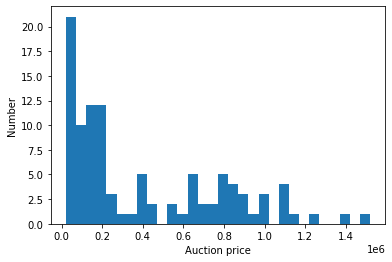

In [53]:
fig, ax = plt.subplots()
_ = ax.hist(IPL_Price_Stats['Auc-Base_price_pounds'], bins=30)
_ = ax.set_xlabel('Auction price')
_ = ax.set_ylabel('Number')
plt.show()

So, pile 'em high, sell 'em cheap seems to be a general approach within teh league, with the majority of players sold at a cheaper price and only a handful of stars at the upper end of the price range.

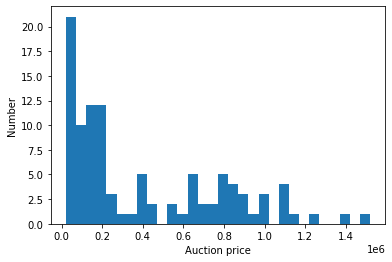

In [54]:
fig, ax = plt.subplots()
_ = ax.hist(IPL_Price_Stats['Auc-Base_price_pounds'], bins=30)
_ = ax.set_xlabel('Auction price')
_ = ax.set_ylabel('Number')
plt.show()

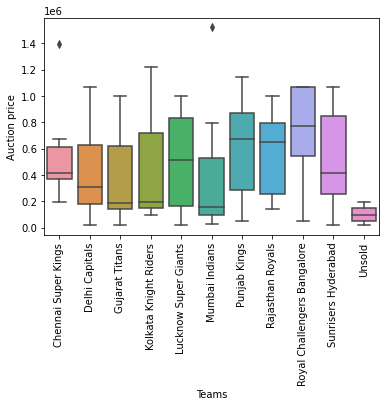

In [55]:
g=sns.boxplot(data=IPL_Price_Stats, x='Team', y='Auc-Base_price_pounds')
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.ylabel("Auction price")
plt.show()

Some interesting variations purchasing data between the different teams/franchises, particularly towards the right-hand side of the chart. Only a couple of outliers - are they really worth that much?
Let's plot some similar boxplots for key batting and bowling stats.

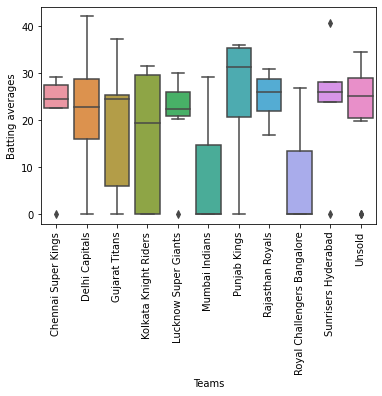

In [56]:
#Create a subset of the data concentrating only on non-Bowlers (ie, those with batting specialisms or functions)
Bat_AllR_WK = IPL_Price_Stats.loc[IPL_Price_Stats['Type']!='Bowler']
g=sns.boxplot(data=Bat_AllR_WK, x='Team', y='Batting_Avg')
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.ylabel("Batting averages")
plt.show()

Can get a reasonable sense of where some teams have had a good return on their investment in relation to batsman, notably Delhi Capitals, Chennai Super Kings, and to extent the Punjab Kings, Rajasthan Royals and Sunriser Hyderabad, although they  of course appeared to be paying more in the auction. On the other hand, Royal Challengeres Bangalore and Mumbai Indians seemed to have flopped with their batting purchasing.

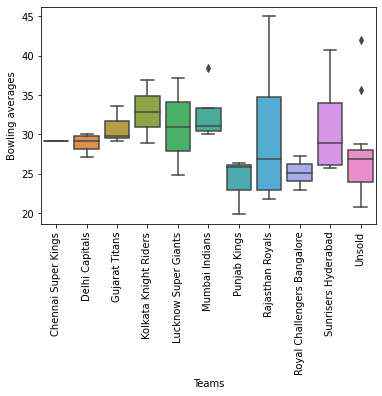

In [57]:
#Repeat above but for bowlers
Bowlers = IPL_Price_Stats.loc[IPL_Price_Stats['Type']=='Bowler']
g=sns.boxplot(data=Bowlers, x='Team', y='Bowling_Avg')
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.ylabel("Bowling averages")
plt.show()

Of course, lower is better with bowling averages, so Punjab Kings, Rajasthan Royals, and Royal Challengers Bangalore seem to be the winners (the latter in contrast to their batting purchases).

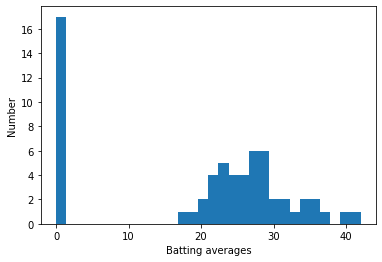

In [58]:
fig, ax = plt.subplots()
_ = ax.hist(Bat_AllR_WK['Batting_Avg'], bins=30)
_ = ax.set_xlabel('Batting averages')
_ = ax.set_ylabel('Number')
plt.show()

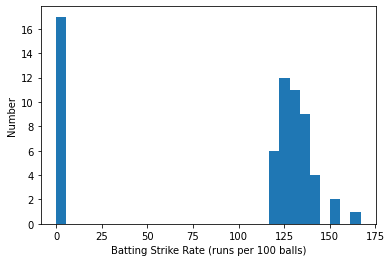

In [59]:
fig, ax = plt.subplots()
_ = ax.hist(Bat_AllR_WK['Bat_SR'], bins=30)
_ = ax.set_xlabel('Batting Strike Rate (runs per 100 balls)')
_ = ax.set_ylabel('Number')
plt.show()

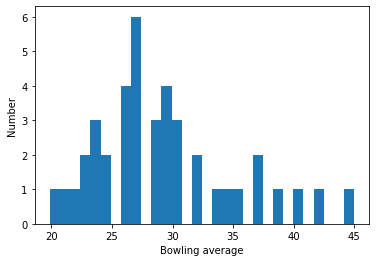

In [60]:
fig, ax = plt.subplots()
_ = ax.hist(Bowlers['Bowling_Avg'], bins=30)
_ = ax.set_xlabel('Bowling average')
_ = ax.set_ylabel('Number')
plt.show()

In [61]:
Bat_AllR_WK.describe()


,Auc-Base_price_pounds,IPL_Bat_Rank,Batting_Matches,Batting_Inns,NO,Batting_runs,HS,Batting_Avg,BF,Bat_SR,...,HS_was_NO,IPL_Bowl_Rank,Bowling_Matches,Bowling_Inns,Ov,Bowling_runs_concd,Wkts,Bowling_Avg,Econ,Bowl_SR
count,6.200000e+01,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,4.427085e+05,46.177419,67.016129,60.758065,11.080645,1416.338710,61.370968,19.856290,1088.935484,95.594516,...,0.338710,38.951613,22.677419,18.709677,59.225806,478.806452,16.774194,12.666774,3.239516,9.549677
std,3.790276e+05,42.772568,62.880447,58.725169,11.735191,1579.179139,41.637874,13.174661,1215.022902,59.772114,...,0.477134,54.965094,39.588363,29.975065,95.734849,783.698960,30.269510,16.360754,3.994886,12.514485
min,1.994400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.171710e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.792160e+05,42.500000,53.000000,45.500000,6.500000,956.000000,70.000000,24.000000,712.500000,126.625000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.603650e+05,76.750000,97.500000,88.750000,17.750000,1852.000000,95.000000,28.627500,1430.250000,133.907500,...,1.000000,85.500000,34.250000,31.750000,106.000000,912.500000,26.750000,29.902500,7.847500,21.150000
max,1.520730e+06,126.000000,229.000000,208.000000,45.000000,6244.000000,127.000000,42.010000,4942.000000,166.870000,...,1.000000,167.000000,205.000000,158.000000,516.000000,4359.000000,183.000000,52.380000,9.320000,45.750000


In [62]:
Bowlers.describe()

,Auc-Base_price_pounds,IPL_Bat_Rank,Batting_Matches,Batting_Inns,NO,Batting_runs,HS,Batting_Avg,BF,Bat_SR,...,HS_was_NO,IPL_Bowl_Rank,Bowling_Matches,Bowling_Inns,Ov,Bowling_runs_concd,Wkts,Bowling_Avg,Econ,Bowl_SR
count,4.100000e+01,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,3.405073e+05,2.731707,3.853659,2.000000,0.780488,14.243902,0.585366,0.284878,12.829268,2.708049,...,0.024390,64.585366,66.219512,65.829268,232.634146,1878.243902,68.487805,29.233902,8.228780,21.261220
std,3.693584e+05,17.491461,24.675454,12.806248,4.997560,91.205477,3.748170,1.824110,82.147399,17.339973,...,0.156174,48.136252,41.956234,41.881322,148.026139,1123.419262,45.796355,5.813280,0.609505,3.529733
min,1.994400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,15.000000,15.000000,55.000000,472.000000,14.000000,19.860000,7.020000,14.420000
25%,6.481800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,25.000000,35.000000,35.000000,127.000000,1075.000000,36.000000,25.790000,7.800000,19.370000
50%,1.595520e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,60.000000,55.000000,54.000000,196.000000,1655.000000,49.000000,28.540000,8.300000,20.810000
75%,5.235300e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,93.000000,91.000000,90.000000,297.000000,2475.000000,92.000000,31.680000,8.530000,22.830000
max,1.396080e+06,112.000000,158.000000,82.000000,32.000000,584.000000,24.000000,11.680000,526.000000,111.030000,...,1.000000,157.000000,165.000000,164.000000,545.000000,4301.000000,166.000000,45.000000,9.740000,31.100000


<AxesSubplot:xlabel='Batting_Avg', ylabel='Auc-Base_price_pounds'>

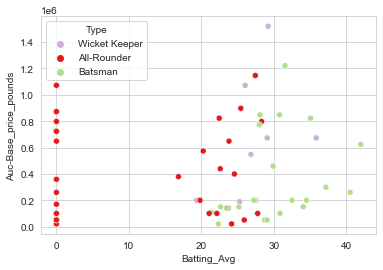

In [63]:
sns.set_style(style='whitegrid')
sns.scatterplot(
    data=Bat_AllR_WK, 
    x='Batting_Avg', 
    y='Auc-Base_price_pounds', 
    hue='Type',
    palette='Paired_r'
    )

<AxesSubplot:xlabel='Bat_SR', ylabel='Auc-Base_price_pounds'>

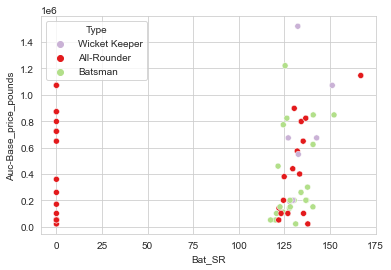

In [64]:
sns.scatterplot(
    data=Bat_AllR_WK, 
    x='Bat_SR', 
    y='Auc-Base_price_pounds', 
    hue='Type',
    palette='Paired_r'
    )

<AxesSubplot:xlabel='Batting_runs', ylabel='Auc-Base_price_pounds'>

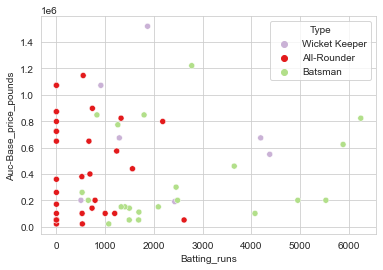

In [65]:
sns.scatterplot(
    data=Bat_AllR_WK, 
    x='Batting_runs', 
    y='Auc-Base_price_pounds', 
    hue='Type',
    palette='Paired_r'
    )

<AxesSubplot:xlabel='Batting_runs', ylabel='Auc-Base_price_pounds'>

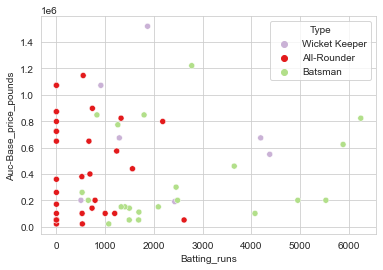

In [66]:
sns.scatterplot(
    data=Bat_AllR_WK, 
    x='Batting_runs', 
    y='Auc-Base_price_pounds', 
    hue='Type',
    palette='Paired_r'
    )

<AxesSubplot:xlabel='Bowling_Avg', ylabel='Auc-Base_price_pounds'>

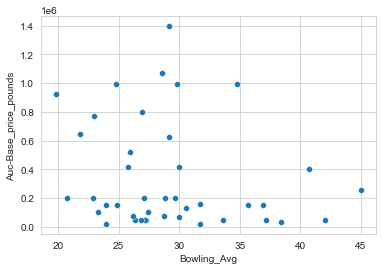

In [67]:
sns.scatterplot(
    data=Bowlers, 
    x='Bowling_Avg', 
    y='Auc-Base_price_pounds',
    palette='Paired_r'
    )

<AxesSubplot:xlabel='Econ', ylabel='Auc-Base_price_pounds'>

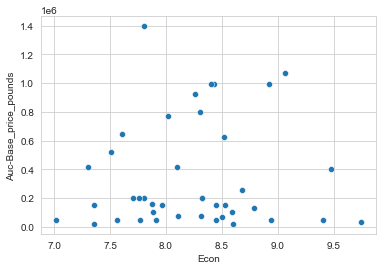

In [68]:
sns.scatterplot(
    data=Bowlers, 
    x='Econ', 
    y='Auc-Base_price_pounds',
    palette='Paired_r'
    )

<AxesSubplot:xlabel='Wkts', ylabel='Auc-Base_price_pounds'>

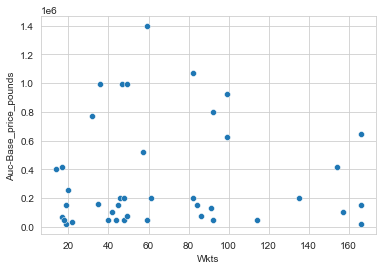

In [69]:
sns.scatterplot(
    data=Bowlers, 
    x='Wkts', 
    y='Auc-Base_price_pounds',
    palette='Paired_r'
    )

<AxesSubplot:xlabel='Bowl_SR', ylabel='Auc-Base_price_pounds'>

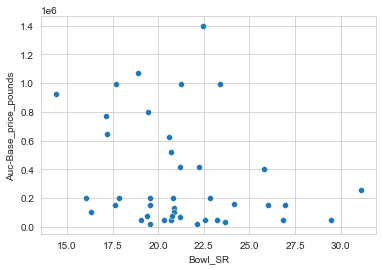

In [70]:
sns.scatterplot(
    data=Bowlers, 
    x='Bowl_SR', 
    y='Auc-Base_price_pounds',
    palette='Paired_r'
    )

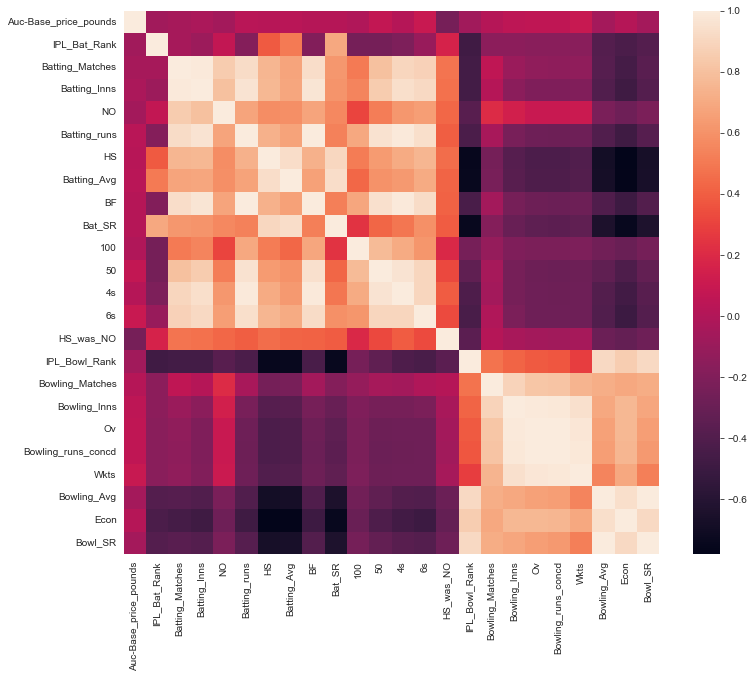

In [71]:
plt.subplots(figsize=(12,10))
sns.heatmap(Bat_AllR_WK.corr());

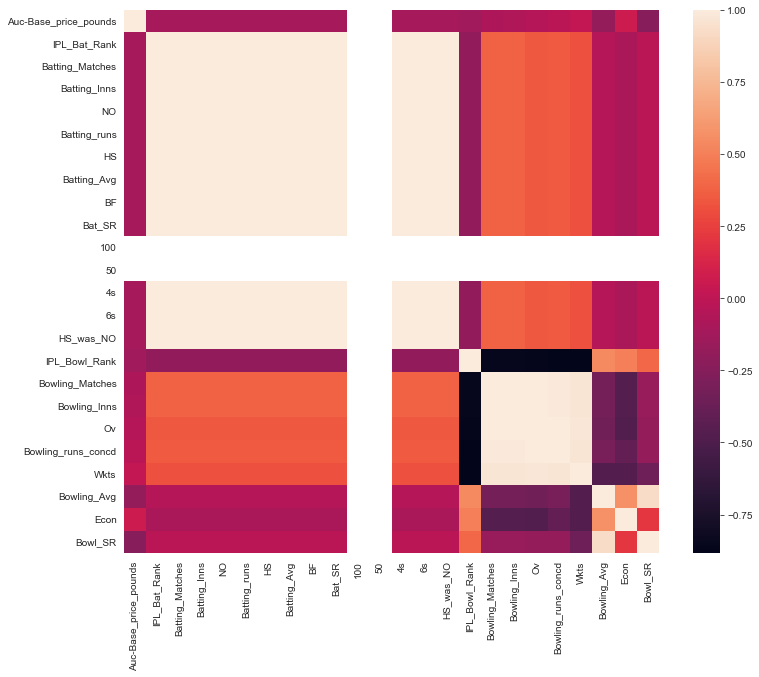

In [72]:
plt.subplots(figsize=(12,10))
sns.heatmap(Bowlers.corr());

In [73]:
# define function to create scatterplots of auction prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Auc-Base_price_pounds', data=Bat_AllR_WK, alpha=0.5)
        ax.set(xlabel=col, ylabel='Auction price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [78]:
#Use a list comprehension to build a list of features from the columns of `Bat_AllR_WK` that
#are not in any of ones  listed here.
features = [column for column in Bat_AllR_WK.columns if column not in ['Player', 'Country', 'Team', 'Type', 'Auc-Base_price_pounds', 'IPL_Bat_Rank', 'Batting_Matches', 'IPL_Bowl_Rank', 'Bowling_Matches']]


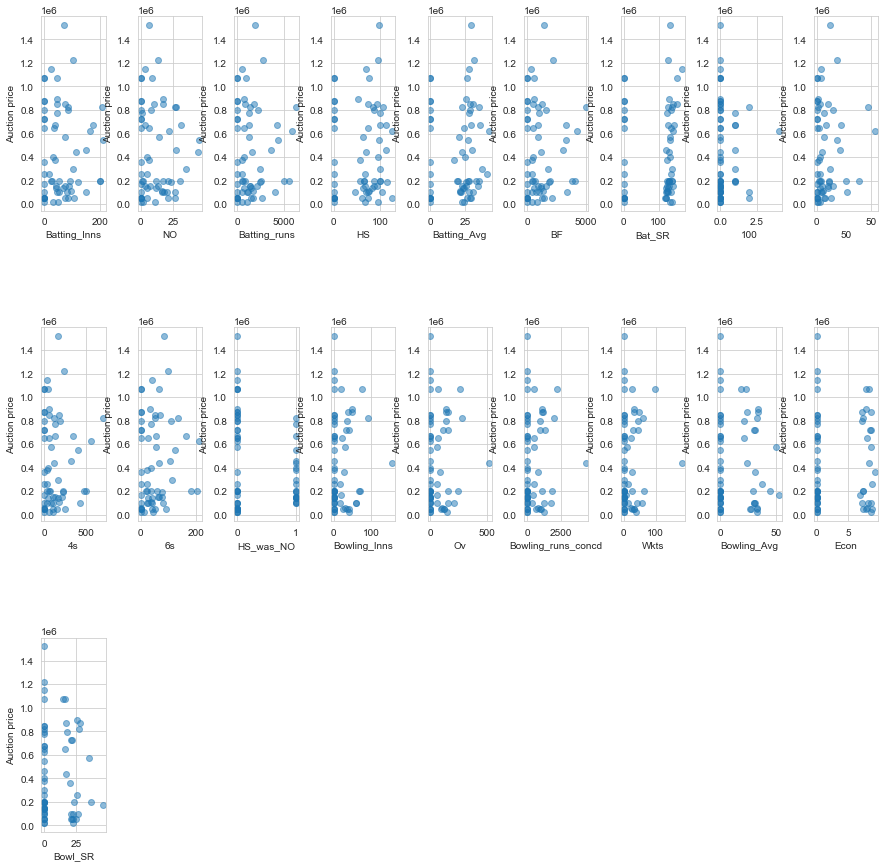

In [79]:
scatterplots(features, ncol=9, figsize=(15, 15))

## Some initial conclusions
The datasets need further work to be more useful, notably a wider range of performance data, for more players, plus also data across the different disciplines. The data found and used so far is overly specialised and focused only on higher performers and doesn't take into account stats from bowlers who have also batted, etc.

The datasets need streamlining so as to be more useful - some of the attributes/data columns are too "noisy" or confusing matters. 

Need also to give consideration to some creating some composite statistics, eg, related to batting averages and runs faced, or NO (not outs) as an average of innings played, and for bowlers (econ rates linked with overs bowled, Strike rate and actual wickets), etc